# Projet Câble sous-marin

# Partie théorique

$\textbf{Question 1}$ :<br><br>
La loi forte des grands nombres nous autorise à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles. En effet la suite des variables aléatoires $\frac{1}{K} \sum\limits_{k=0}^K L_{k}$ converge presque sûrement vers $\mathbb{E}(L) $ (avec les $L_k$ des variables aléatoires indépendantes, de même loi que $L$, que l'on suppose intégrable ou de carré intégrable). <br>En simulant la valeur de $\frac{1}{K} \sum\limits_{k=0}^K L_{k}$, soit en calculant $\frac{1}{K} \sum\limits_{k=0}^K l_{k}$ avec les $l_k$ le résultat de la k-ième simulation de $L$, on obtiendra une valeur proche de $\mathbb{E}(L) $.<br><br>   On peut effectuer la même procédure avec des variables aléatoires $L'_k$ indépendantes mais de loi $L|Z=z$ avec $z$ un vecteur donné, pour avoir une estimation de la longueur du câble avec certains points fixés.

$\textbf{Question 2}$ :<br><br>
On note $Y$ le vecteur aléatoire formé des composantes de $Z$ correspondant
aux points de discrétisation sans observation.<br><br>
Z est un vecteur aléatoire gaussien de matrice de covariance notée $C$. Cette matrice $C$ est calculée à partir de la distance entre les points et à l'aide d'une fonction décroissante qui, appliquée aux coefficients d'une matrice de distance, donne une matrice définie positive (cette fonction est notée C aussi dans le polycopié).
<br><br>
    D'après le cours, si l'on note $C_y$ la matrice de covariance extraite de la matrice C pour les points fixés de Z (c'est donc la matrice qui contient uniquement les lignes et les colonnes dont l'indice correspond au numéro d'un point de Z (en comptant à partir de zéro) qui est fixé), alors $Y|Z=z$ est un vecteur gaussien qui admet pour densité la fonction: \begin{equation} f_{Y|Z=z}:y \rightarrow \frac{1}{(2\pi)^\frac{n-n_f}{2} \sqrt{\det{C S_Y}}}\exp(-\frac{1}{2} (y-\psi(z))^\top [C S_Y] ^{-1} (y-\psi(z)) \end{equation}
 <br><br>
 avec $n$ le nombre de points considérés dans $Z$, et $n_f$ le nombre de points fixés, $\psi(z) = m_Y + C_{Y,Z} C_{z}^{−1} (z − m_Z)$ ou $m_Y$ est le vecteur contenant les espérances des composantes de Y lorsqu'il n'y a pas de conditionnement et $C S_Y$  tel que  $C S_Y=C_Y − C_{Y,Z} C_Z^{−1}C_{Z,Y}$
 


$\textbf{Question 3}$ :<br><br>
$Y = (Y_1, . . . , Y_p)$ est un vecteur de composantes gaussiennes indépendantes, d’espérance nulle et de variance 1.

<br>
Nous allons utiliser le théorème qui stipule qu'un vecteur aléatoire est gaussien si et seulement si toute combinaison linéaire de ses composantes est une variable aléatoire gausienne.<br>
Prenons une composante de $RY$. Cette variable aéatoire s'écrit comme une combinaison linéaire de composantes de Y (car on a $[RY]_i=\sum\limits_{j=0}^p R_{ij}Y_j$  ).
<br>
Si on forme maintenant une combinaison linéaire quelconque de composantes de $RY$, cette quantité va elle même pouvoir s'écrire comme une combinaison linéaire des composantes de $Y$. Le théorème nous dit donc que cette quantité est une variable aléatoire réelle gausienne.

Ainsi, toute combinaison des composantes de $RY$ est une variable aléatoire gaussienne. Le théorème nous dis alors que RY est un vecteur gaussien, et donc que $Z=m + RY$ est un vecteur gaussien, car m est constant.
<br> <br> 
On note $C$ la matrice de covariance de $Z$.

<br>
Par linéarite de l'espérance, on a en calculant composante par composante:  $\mathbb{E}(Z)=m$ et par indépendance des $Y_i$, pour $0\leq i \leq p-1$ et $0\leq j \leq p-1$: <br>  $C_{ij}=cov(Z_i,Z_j)=cov(m_i + \sum\limits_{k=0}^p R_{ik}Y_k,m_j + \sum\limits_{k=0}^p R_{jk}Y_k = \sum\limits_{k=0}^p R_{ik}R_{jk}\mathbb{V}(Y_k)=\sum\limits_{k=0}^p R_{ik}R_{jk}={[R R^\top}]_{ij}$ 
<br>
Donc $C=R R^\top$
<br>
On connaît ainsi entièrement la loi de $Z$.


$\textbf{Question 4}$ :<br><br>
On connait déja les valeurs de Z pour les points où il y a une observation. Il faut maintenant simuler le vecteur $Y$ de la question 2. Ce vecteur aléatoire est gaussien, et on connaît sa matrice de covariance $C_y=C S_y$ ainsi que son espérance  $\psi(z) = m_Y + C_{Y,Z} C_{z}^{−1} (z − m_Z)$. <br> <br>

On utilise la question précédente, qui nous permet de simuler à partir d'un vecteur gaussien de matrice de covariance la matrice identité et d'espérance nulle le vecteur gaussien qu'on cherche. 
On sait en effet simuler un vecteur gaussien de matrice de covariance la matrice identité et d'espérance nulle, cela revient à simuler n fois une variable aléatoire réelle gausienne)
 <br> <br>
Pour que la méthode soit applicable, il faut qu'il existe $R$ tel que $C_y=R R^\top$. Une telle matrice existe car $C_y$ est symétrique et définie positive (par propriété sur le complément de Schur: $C$ est symétrique définie positive et en réorganisant les colonnes et lignes de $C$ pour regrouper les indices correspondant aux points observés et ceux non obervés entre eux, le bloc en bas à gauche est la transposée du bloc en haut à droite).<br> <br>Pour la trouver, on utilise la fonction numpy linalg.cholesky. 

# Partie code

Voici la première partie du code donné.

In [20]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500

N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))
  

    

$\textbf{Question 1}$ : On défini C qui retourne la covariance entre deux points (en prenant en argument la distance entre deux points)

In [21]:
def C(M,a,sigma2):
    
    return sigma2*np.exp(-M/a)

$\textbf{Question 2}$ : On définit mat_distance qui retourne la matrice de distance 

In [22]:
def matrice_distance(x):
    C=np.array([x]*len(x)).T
    D=np.array([x]*len(x))
    return np.abs((C-D)*Delta)

$\textbf{Question 3}$ : Le calcul de la matrice de covariance est réalisé par le code suivant:

In [23]:
matrice_covZ=C(matrice_distance(discretization_indexes),a,sigma2)
print(matrice_covZ)

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


$\textbf{Question 4}$ :

In [24]:
cov_z= matrice_covZ[0:101:20, 0:101:20]
cov_yz = np.transpose(np.delete(matrice_covZ, observation_indexes, axis=1)[0:101:20])
cov_y = np.delete(np.delete(matrice_covZ, observation_indexes, axis=0), observation_indexes, axis=1)

$\textbf{Question 5}$ :

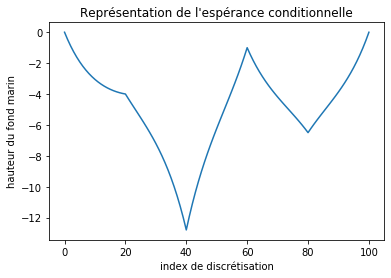

In [25]:
my = np.full((95),-5)
cov_z_inv = np.linalg.inv(cov_z)
m_cond = my + np.dot(cov_yz, np.dot(cov_z_inv, depth - np.full((6,), -5)))
l = m_cond.copy()
for i in range(6):
    l = np.insert(l,observation_indexes[i],depth[i])
    

fig, ax = plt.subplots()
ax.set_title("Représentation de l'espérance conditionnelle")
ax.set_xlabel('index de discrétisation')
ax.set_ylabel('hauteur du fond marin')

plt.plot(l)
plt.show()

$\textbf{Question 6}$ :

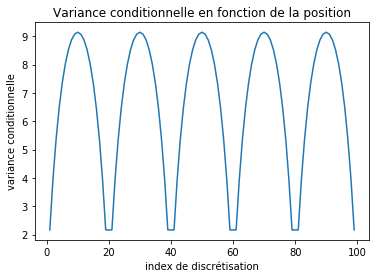

In [28]:
csy = cov_y - np.dot(cov_yz, np.dot(cov_z_inv, np.transpose(cov_yz)))

fig, ax = plt.subplots()
ax.set_title("Variance conditionnelle en fonction de la position")
ax.set_xlabel('index de discrétisation')
ax.set_ylabel('variance conditionnelle')

plt.plot(np.delete(np.arange(101),observation_indexes),np.diag(csy))
plt.show()

Les coefficients diagonaux de la matrice de covariance sont les variances des profondeurs. 
On observe donc que la variance de la profondeur augmente lorsque l'on s'éloigne des points connus, ce qui semble logique.

$\textbf{Question 7}$ :

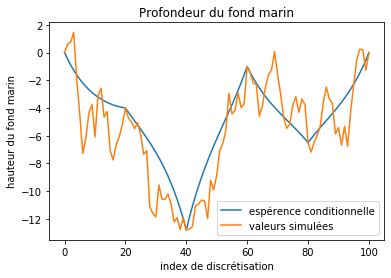

In [29]:
def simulation():
    y = np.random.randn(95)
    R = np.linalg.cholesky(csy)
    Z = m_cond + np.dot(R,y)
    for i in range(6):
        Z = np.insert(Z,observation_indexes[i],depth[i])
    return Z
Z = simulation()

fig, ax = plt.subplots()
ax.set_title("Profondeur du fond marin")
ax.set_xlabel('index de discrétisation')
ax.set_ylabel('hauteur du fond marin')

plt.plot(l ,label="espérence conditionnelle")
plt.plot(Z, label="valeurs simulées")
plt.legend()
plt.show()

On observe qu'on obtient bien des valeurs de profondeur cohérentes avec les valeurs aux points d'observation : on a donc bien réalisé un conditionnement.

$\textbf{Question 8}$ : La fonction suivante calcule la longueur du câble à parti du vectcteur des profondeurs du fond marin.

In [30]:
def L(Z,delta):
    S=0
    for i in range(1,len(Z)):
        S+=np.sqrt(delta**2+(Z[i]-Z[i-1])**2)
    return S

$\textbf{Question 9}$ : Estimation de la longueur du cable:

In [31]:
def calcL(n):
    L_tot = 0
    for i in range(n):
        L_tot += L(simulation(), Delta)
    L_tot /= n
    return L_tot
    
    
l_m = L(l, Delta)
print("longueur de l'espérance conditionnelle : ", l_m)
L_tot = calcL(100)
print("espérance conditionnelle de la longueur : ", L_tot)

longueur de l'espérance conditionnelle :  501.6468416918411
espérance conditionnelle de la longueur :  522.5012629533263


On remarque que la longueur de l'espérance conditionnelle est plus petite que l'espérance conditionnelle de la longueur. En effet, alors que l'espérance conditionelle est le chemin le plus probable donc celui en ligne droite et donc le plus court, les chemins réels sont tous oscillants et donc plus longs. En conséquence, l'espérance conditionnelle de la longueur et plus longue et représente mieux la réalité.

$\textbf{Question 10}$ : On représente L en fonction de la simulation réalisée.

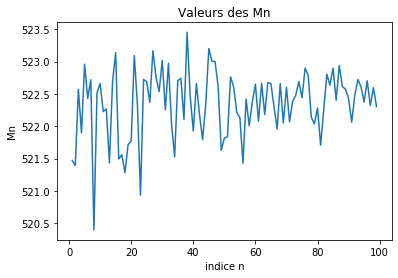

In [32]:
list_Long = []
for i in range(1,100):
    list_Long.append(calcL(i))
    
fig, ax = plt.subplots()
ax.set_title("Valeurs des Mn")
ax.set_xlabel('indice n')
ax.set_ylabel('Mn')
plt.plot([i for i in range(1,100)], list_Long)
plt.show()

La moyenne des longueurs de câble en fonction du nombre de simulations semble se stabiliser vers une valeur limite d'environ 522.5.

$\textbf{Question 11}$ : 

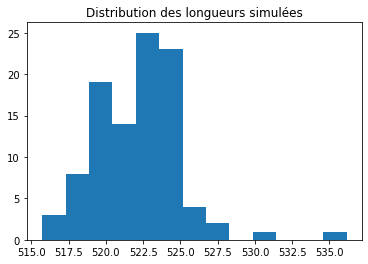

In [33]:
depths = [L(simulation(), Delta) for i in range(100)]

fig, ax = plt.subplots()
ax.set_title("Distribution des longueurs simulées")
plt.hist(depths,bins='auto')
plt.show()

$\textbf{Question 12}$ : La première méthode consiste à prendre l'intervalle autour de la moyenne des longeurs dans lequel il y a exactement 95% des valeurs de la simulation.

In [34]:
import statistics

m = statistics.mean(depths)
    
depths = sorted(depths, key=lambda a: abs(a - m))

taille = abs(depths[94] - m)

print("l'intervalle de confiance à 95% est : [", m - taille, " , ", m + taille, "]")

l'intervalle de confiance à 95% est : [ 516.5195646122838  ,  527.918844744321 ]


La deuxième méthode consiste à calculer l'écart-type de l'échantillon. Le théorème centrale limite affirme que la loi de la moyenne converge vers un loi normale. On peut donc calculer l'intervalle de confiance à partir de l'écart-type.

In [35]:
S = 0
for x in depths:
    S += (m - x)**2
eType = np.sqrt(S/len(depths))
taille2 = 1.96 * eType
print("l'intervalle de confiance à 95% est : [", m - taille2, " , ", m + taille2, "]")

l'intervalle de confiance à 95% est : [ 516.3701160330228  ,  528.068293323582 ]


$\textbf{Question 13}$ : Pour estimer la probabilité que la longueur du câble dépasse 525m, on simule n échantillons de longueur et on compte ceux qui sont supérieurs à 525m.

In [36]:
n=1000
p = np.sum(np.array([L(simulation(), Delta) for k in range(n)])>525.0)/n #on compte le nombre de simulations pour lesquelles L dépasse 525m
print("L'estimation est : ",p)
    

L'estimation est :  0.189


$\textbf{Question 14}$

In [37]:
def sim(n):
    print("Pour n = ",n)
    depths = [L(simulation(), Delta) for i in range(n)]
    
    fig, ax = plt.subplots()
    ax.set_title("Distribution des longueurs simulées")
    ax.set_xlabel('longueur (m)')
    ax.set_ylabel('fréquence')
    plt.hist(depths,bins='auto')
    plt.show()
    
    m = statistics.mean(depths)
    
    depths = sorted(depths, key=lambda a: abs(a - m))

    taille = abs(depths[int(0.95*n) - 1] - m)

    print("l'intervalle de confiance à 95% avec la première méthode est : [", m - taille, " , ", m + taille, "]")
    S = 0
    for x in depths:
        S += (m - x)**2
    eType = np.sqrt(S/len(depths))
    taille2 = 1.96 * eType
    print("l'intervalle de confiance à 95% avec la deuxième méthode est : [", m - taille2, " , ", m + taille2, "]")
    print("L'estimation est : ",np.sum(np.array(depths)>525.0)/n)

Pour n =  1000


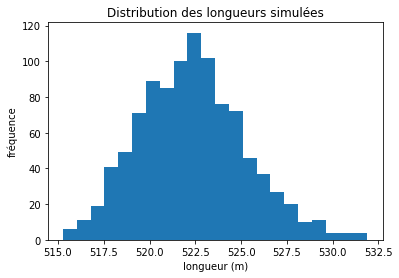

l'intervalle de confiance à 95% avec la première méthode est : [ 516.6587667864783  ,  528.0286834084725 ]
l'intervalle de confiance à 95% avec la deuxième méthode est : [ 516.6373102365542  ,  528.0501399583966 ]
L'estimation est :  0.174
Pour n =  10000


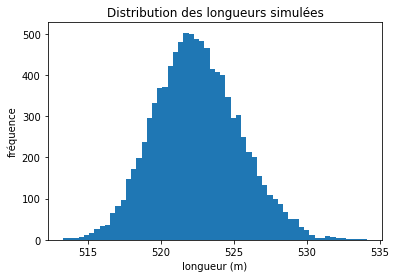

l'intervalle de confiance à 95% avec la première méthode est : [ 516.7869601702082  ,  528.1800627562241 ]
l'intervalle de confiance à 95% avec la deuxième méthode est : [ 516.758256369504  ,  528.2087665569283 ]
L'estimation est :  0.1932
Pour n =  100000


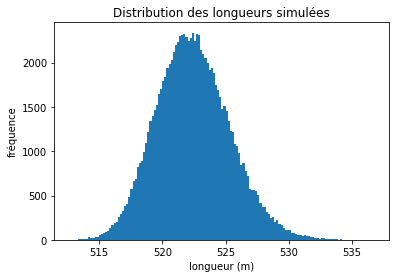

l'intervalle de confiance à 95% avec la première méthode est : [ 516.786607002186  ,  528.0944870898429 ]
l'intervalle de confiance à 95% avec la deuxième méthode est : [ 516.7589340824378  ,  528.1221600095911 ]
L'estimation est :  0.18584


In [38]:
sim(1000)
sim(10000)
sim(100000)

On remarque que la loi de $L$ ne semble pas être une loi normale car sa distribution n'est pas symétrique par rapport à son espérance.